## Introduction

The purpose of this analysis is to reinforce the data science methotology and process from reviewing the problem in question, getting and cleaning the data, analyzing it and further creating a predictive model. This report will revolve around the use case of New York Real Estate market. 

I am interested in automating the process of figuring out estimated price of a real estate properly in the recent future. Can I predict the sale price of a property within a certain area? Can I figure out estimated price of a property within a certain neighbourhood? Can I predict the future up and coming neighborhood within a borough? These are some of the questions I will try to answer with my analysis.

I will start downloading my libraries.

## Importing Modules and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Besides these standard libraries, i will import sklearn, warnings for my predictive model and itertools moduole for iteration and looping.

In [2]:
import itertools
import sklearn as sk
import warnings

I will also set the style use of seaborn and matplotlib for my visualizations.

In [3]:
sns.set(style='white', context='notebook', palette='deep')
import matplotlib.style as style
style.use('fivethirtyeight')

Finally will import regression , metrics and other model libraries for ML from sklearn

In [4]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

In [7]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

I will further import my data and start the cleaning process. I grabbed the data "nyc-rolling-sales" from Kaggle. It is in csv format and easy to import.

## Import the Data

In [8]:
df=pd.read_csv('../input/nyc-rolling-sales.csv')

In [9]:
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


When I initially look at the data set, I see "Unnamed o" column as a possible index coming from the csv and "Easement" variable that doesnt have any value in the rows. I will drop these columns.

## Data Cleaning

In [10]:
df.drop(columns={'Unnamed: 0', 'EASE-MENT'}, inplace=True)

In [11]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [12]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [13]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

The Boroguh column has integer type; based on the value of the variable, this is correct; however, Borough should have me a name such as "Manhattan" or "Brooklyn". According the data set from Kaggle I will convert the numeric values into the Borough names.

In [14]:
df['BOROUGH'][df['BOROUGH']==1]='Manhattan'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df['BOROUGH'][df['BOROUGH']==2]='Bronx'

In [16]:
df['BOROUGH'][df['BOROUGH']==3]='Brooklyn'

In [17]:
df['BOROUGH'][df['BOROUGH']==4]='Queens'

In [18]:
df['BOROUGH'][df['BOROUGH']==5]='Staten Island'

In [19]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           84548 non-null object
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEAR BUILT                        84548 non-null int64
TA

Part of the cleaning process I will look for the missing and duplicate data. 3 Steps to cleaning the missing data, I will identify them and either remove, correct or replace them.

In [21]:
missing_data=df.isnull()

In [22]:
missing_data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

BOROUGH
False    84548
Name: BOROUGH, dtype: int64

NEIGHBORHOOD
False    84548
Name: NEIGHBORHOOD, dtype: int64

BUILDING CLASS CATEGORY
False    84548
Name: BUILDING CLASS CATEGORY, dtype: int64

TAX CLASS AT PRESENT
False    84548
Name: TAX CLASS AT PRESENT, dtype: int64

BLOCK
False    84548
Name: BLOCK, dtype: int64

LOT
False    84548
Name: LOT, dtype: int64

BUILDING CLASS AT PRESENT
False    84548
Name: BUILDING CLASS AT PRESENT, dtype: int64

ADDRESS
False    84548
Name: ADDRESS, dtype: int64

APARTMENT NUMBER
False    84548
Name: APARTMENT NUMBER, dtype: int64

ZIP CODE
False    84548
Name: ZIP CODE, dtype: int64

RESIDENTIAL UNITS
False    84548
Name: RESIDENTIAL UNITS, dtype: int64

COMMERCIAL UNITS
False    84548
Name: COMMERCIAL UNITS, dtype: int64

TOTAL UNITS
False    84548
Name: TOTAL UNITS, dtype: int64

LAND SQUARE FEET
False    84548
Name: LAND SQUARE FEET, dtype: int64

GROSS SQUARE FEET
False    84548
Name: GROSS SQUARE FEET, dtype: int64

YEAR BUILT
False    8454

In [24]:
sum(df.duplicated(df.columns))

765

There isnt any missing data value in the dataset however there are 765 duplicates. I will remove the duplicated data so it doesnt hinder the analysis.

In [25]:
df=df.drop_duplicates(df.columns, keep='last')

In [26]:
sum(df.duplicated(df.columns))

0

Since there are no duplicated data, I can look at the values and make sure they have correct data types.

In [27]:
df.dtypes

BOROUGH                           object
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [28]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


"SALE PRICE', "YEAR BUILT", "LAND SQUARE FEET", "GROSS SQUARE FEET" have 'object' values but should all be numeric. "SALE DATE" has an 'object' value but should be datatime, "TAX CLASS AT THE TIME OF SALE" has 'integer' value but should be categorical. "TAX CLASS AT PRESENT" has 'object' value and should also have categorical value.

In [29]:
df['SALE PRICE']=pd.to_numeric(df['SALE PRICE'], errors='coerce')

In [30]:
df['YEAR BUILT']=pd.to_numeric(df['YEAR BUILT'], errors='coerce')

In [31]:
df['LAND SQUARE FEET']=pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')

In [32]:
df['GROSS SQUARE FEET']=pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

In [33]:
df['SALE DATE']=pd.to_datetime(df['SALE DATE'], errors='coerce')

In [34]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['ZIP CODE'] = df['ZIP CODE'].astype('category')

In [35]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


There are NaN values in the "SALE PRICE" variable, I will replace them with average Sale Price

In [36]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

There are 26054 missing data for "Land Square Feet", 27385 for "Gross Square Feet" and 14176 missing values for "SALE PRICE". I will;
<ul>
    <li> Avg each missing data variable</li>
    <li> Replace the missing dat value with the avg</li>

In [37]:
avg_land=df['LAND SQUARE FEET'].astype('float').mean(axis=0)

In [38]:
df['LAND SQUARE FEET'].replace(np.nan, avg_land, inplace=True)

In [39]:
avg_gross=df['GROSS SQUARE FEET'].astype('float').mean(axis=0)

In [40]:
df['GROSS SQUARE FEET'].replace(np.nan, avg_gross, inplace=True)

In [41]:
avg_sale_price=df['SALE PRICE'].astype('float').mean(axis=0)

In [42]:
df['SALE PRICE'].replace('np.nan, avg_sale_price', inplace=True)

In [43]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


There are null values in the SALE PRICE data. 

In [44]:
var=df.columns
count=[]
for variable in var:
    length=df[variable].count()
    count.append(length)

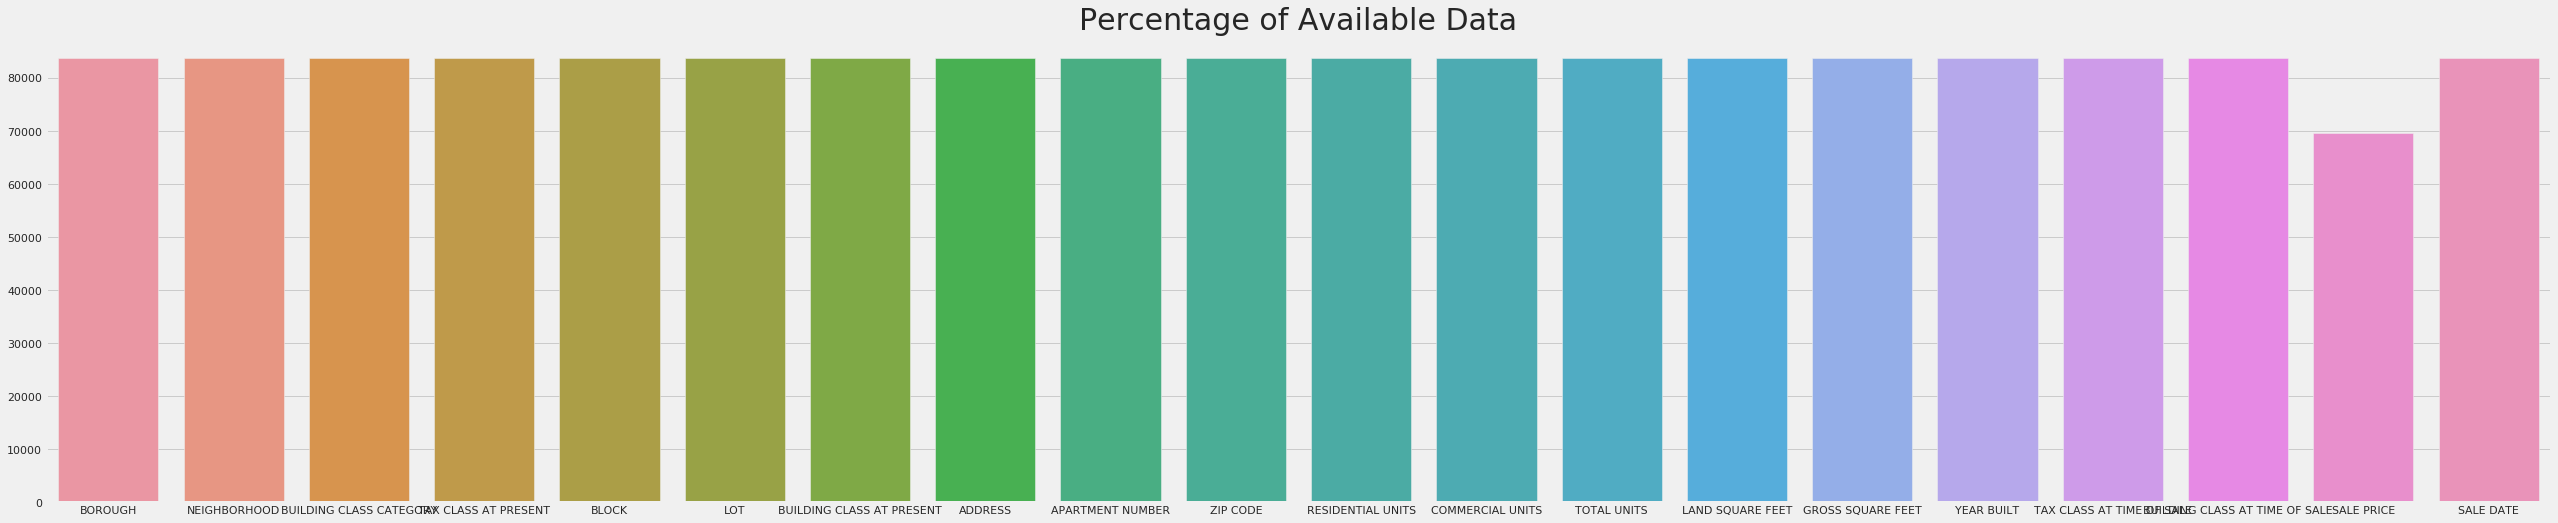

In [45]:
plt.figure(figsize=(40,8))
sns.barplot(x=var, y=count)
plt.title('Percentage of Available Data', fontsize=30)
plt.show()

There are 10,000 values showing up as null for SALE DATA. These needs to be removed from our observations. 

Standardization or normalization is not required in this case. I corrected the data types, removed duplicate data and there are no missing data values. I can further start analyszing the data set. Woot!

## Data Exploration

In [46]:
df.corr()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BLOCK,1.000000,-0.229281,-0.015125,-0.002646,-0.015033,-0.000093,-0.035706,0.070965,-0.061249
LOT,-0.229281,1.000000,-0.033839,-0.010553,-0.032603,-0.014114,-0.013201,-0.290821,0.012319
RESIDENTIAL UNITS,-0.015125,-0.033839,1.000000,0.016257,0.889602,0.405051,0.692307,0.025165,0.122465
COMMERCIAL UNITS,-0.002646,-0.010553,0.016257,1.000000,0.471040,0.035965,0.062703,0.006100,0.044534
TOTAL UNITS,-0.015033,-0.032603,0.889602,0.471040,1.000000,0.373769,0.639434,0.024215,0.126576
LAND SQUARE FEET,-0.000093,-0.014114,0.405051,0.035965,0.373769,1.000000,0.527130,-0.015580,0.060132
GROSS SQUARE FEET,-0.035706,-0.013201,0.692307,0.062703,0.639434,0.527130,1.000000,0.017003,0.449638
YEAR BUILT,0.070965,-0.290821,0.025165,0.006100,0.024215,-0.015580,0.017003,1.000000,-0.003708
SALE PRICE,-0.061249,0.012319,0.122465,0.044534,0.126576,0.060132,0.449638,-0.003708,1.000000


In [47]:
df[['COMMERCIAL UNITS', 'SALE PRICE']].corr()

,COMMERCIAL UNITS,SALE PRICE
COMMERCIAL UNITS,1.000000,0.044534
SALE PRICE,0.044534,1.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


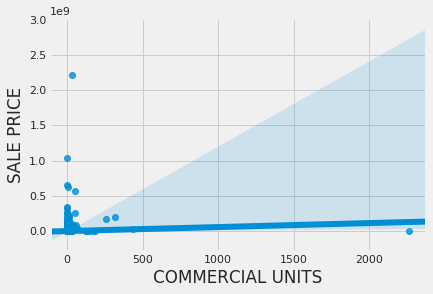

In [48]:
sns.regplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)

There is not much correlation with commercial units in a neighborhood and sale price

In [49]:
df[['LAND SQUARE FEET', 'SALE PRICE']].corr()

,LAND SQUARE FEET,SALE PRICE
LAND SQUARE FEET,1.000000,0.060132
SALE PRICE,0.060132,1.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


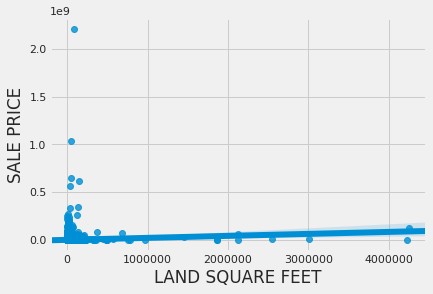

In [50]:
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df)

Interestingly there correlation between Land Square Feet and Sale Price is weak as well

In [51]:
df[['GROSS SQUARE FEET', 'SALE PRICE']].corr()

,GROSS SQUARE FEET,SALE PRICE
GROSS SQUARE FEET,1.000000,0.449638
SALE PRICE,0.449638,1.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


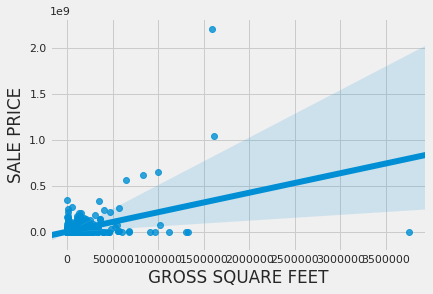

In [52]:
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df)

There is definately strong correlation between Gross Square Feet and Sale Price. Regression line is not that bad in this case so I can use Gross Square Feet as a predictor variable.

I will explore more around the neighboorhood and boroughs. 

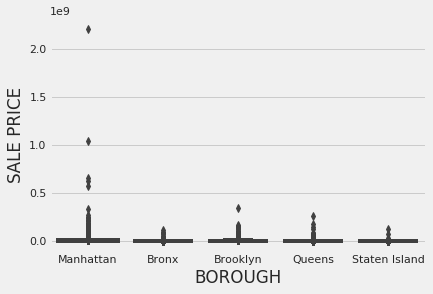

In [53]:
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)

In [54]:
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14


In [55]:
df.describe(include=['object'])

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,BUILDING CLASS AT TIME OF SALE
count,83783,83783,83783,83783,83783,83783,83783
unique,5,254,47,167,67563,3989,166
top,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,D4,131-05 40TH ROAD,,R4
freq,26548,3058,18107,12637,210,64934,12929


Grouping the dataset based on Boroughs will help segmenting my analysis.

In [56]:
df_borough=df[['BOROUGH','SALE PRICE', 'SALE DATE']]

In [57]:
df_borough.head(5)

,BOROUGH,SALE PRICE,SALE DATE
0,Manhattan,6625000.0,2017-07-19
1,Manhattan,NaN,2016-12-14
2,Manhattan,NaN,2016-12-09
3,Manhattan,3936272.0,2016-09-23
4,Manhattan,8000000.0,2016-11-17


In [58]:
df_borough=df_borough.groupby(['BOROUGH'], as_index=False).mean()

In [59]:
df_borough.head(100)

,BOROUGH,SALE PRICE
0,Bronx,5.946771e+05
1,Brooklyn,8.410834e+05
2,Manhattan,3.344642e+06
3,Queens,7.388827e+05
4,Staten Island,5.436113e+05


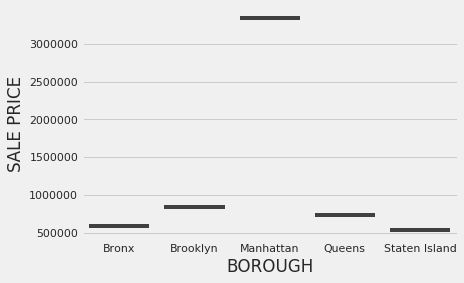

In [60]:
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df_borough)

Manhattan has the most expensive houses in averege, followed by Brooklyn, Queens, Bronx and Staten Island. The median gap between Manhattan and other boroughs is huge.

Let's examine "Manhattan" in more detail.

In [61]:
df_manhattan=df[(df['BOROUGH']=='Manhattan')]

In [62]:
df_manhattan

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.000000,6440.000000,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.000000,18690.000000,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.000000,7803.000000,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.000000,6794.000000,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.000000,4615.000000,1900,2,C2,8000000.0,2016-11-17
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,10009,20,0,20,2581.000000,9730.000000,1900,2,C4,NaN,2017-07-20
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.000000,4226.000000,1920,2,C4,3192840.0,2016-09-23
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,,10009,44,2,46,5163.000000,21007.000000,1900,2,C7,NaN,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,,10009,15,0,15,1534.000000,9198.000000,1920,2,D5,NaN,2017-06-20
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.000000,18523.000000,1920,2,D9,16232000.0,2016-11-07


In [63]:
df_manhattan_neighborhood=df[['NEIGHBORHOOD', 'RESIDENTIAL UNITS','SALE PRICE', 'SALE DATE']]

In [64]:
df_manhattan_neighborhood=df_manhattan_neighborhood.groupby(['NEIGHBORHOOD', 'SALE PRICE'], as_index=False).mean()

In [65]:
df_manhattan_neighborhood

,NEIGHBORHOOD,SALE PRICE,RESIDENTIAL UNITS
0,AIRPORT LA GUARDIA,10.0,1.0
1,AIRPORT LA GUARDIA,275500.0,1.0
2,AIRPORT LA GUARDIA,329000.0,1.0
3,AIRPORT LA GUARDIA,425000.0,1.0
4,AIRPORT LA GUARDIA,792000.0,1.0
5,AIRPORT LA GUARDIA,970000.0,3.0
6,AIRPORT LA GUARDIA,1400000.0,6.0
7,ALPHABET CITY,1.0,0.0
8,ALPHABET CITY,10.0,0.0
9,ALPHABET CITY,25000.0,0.0


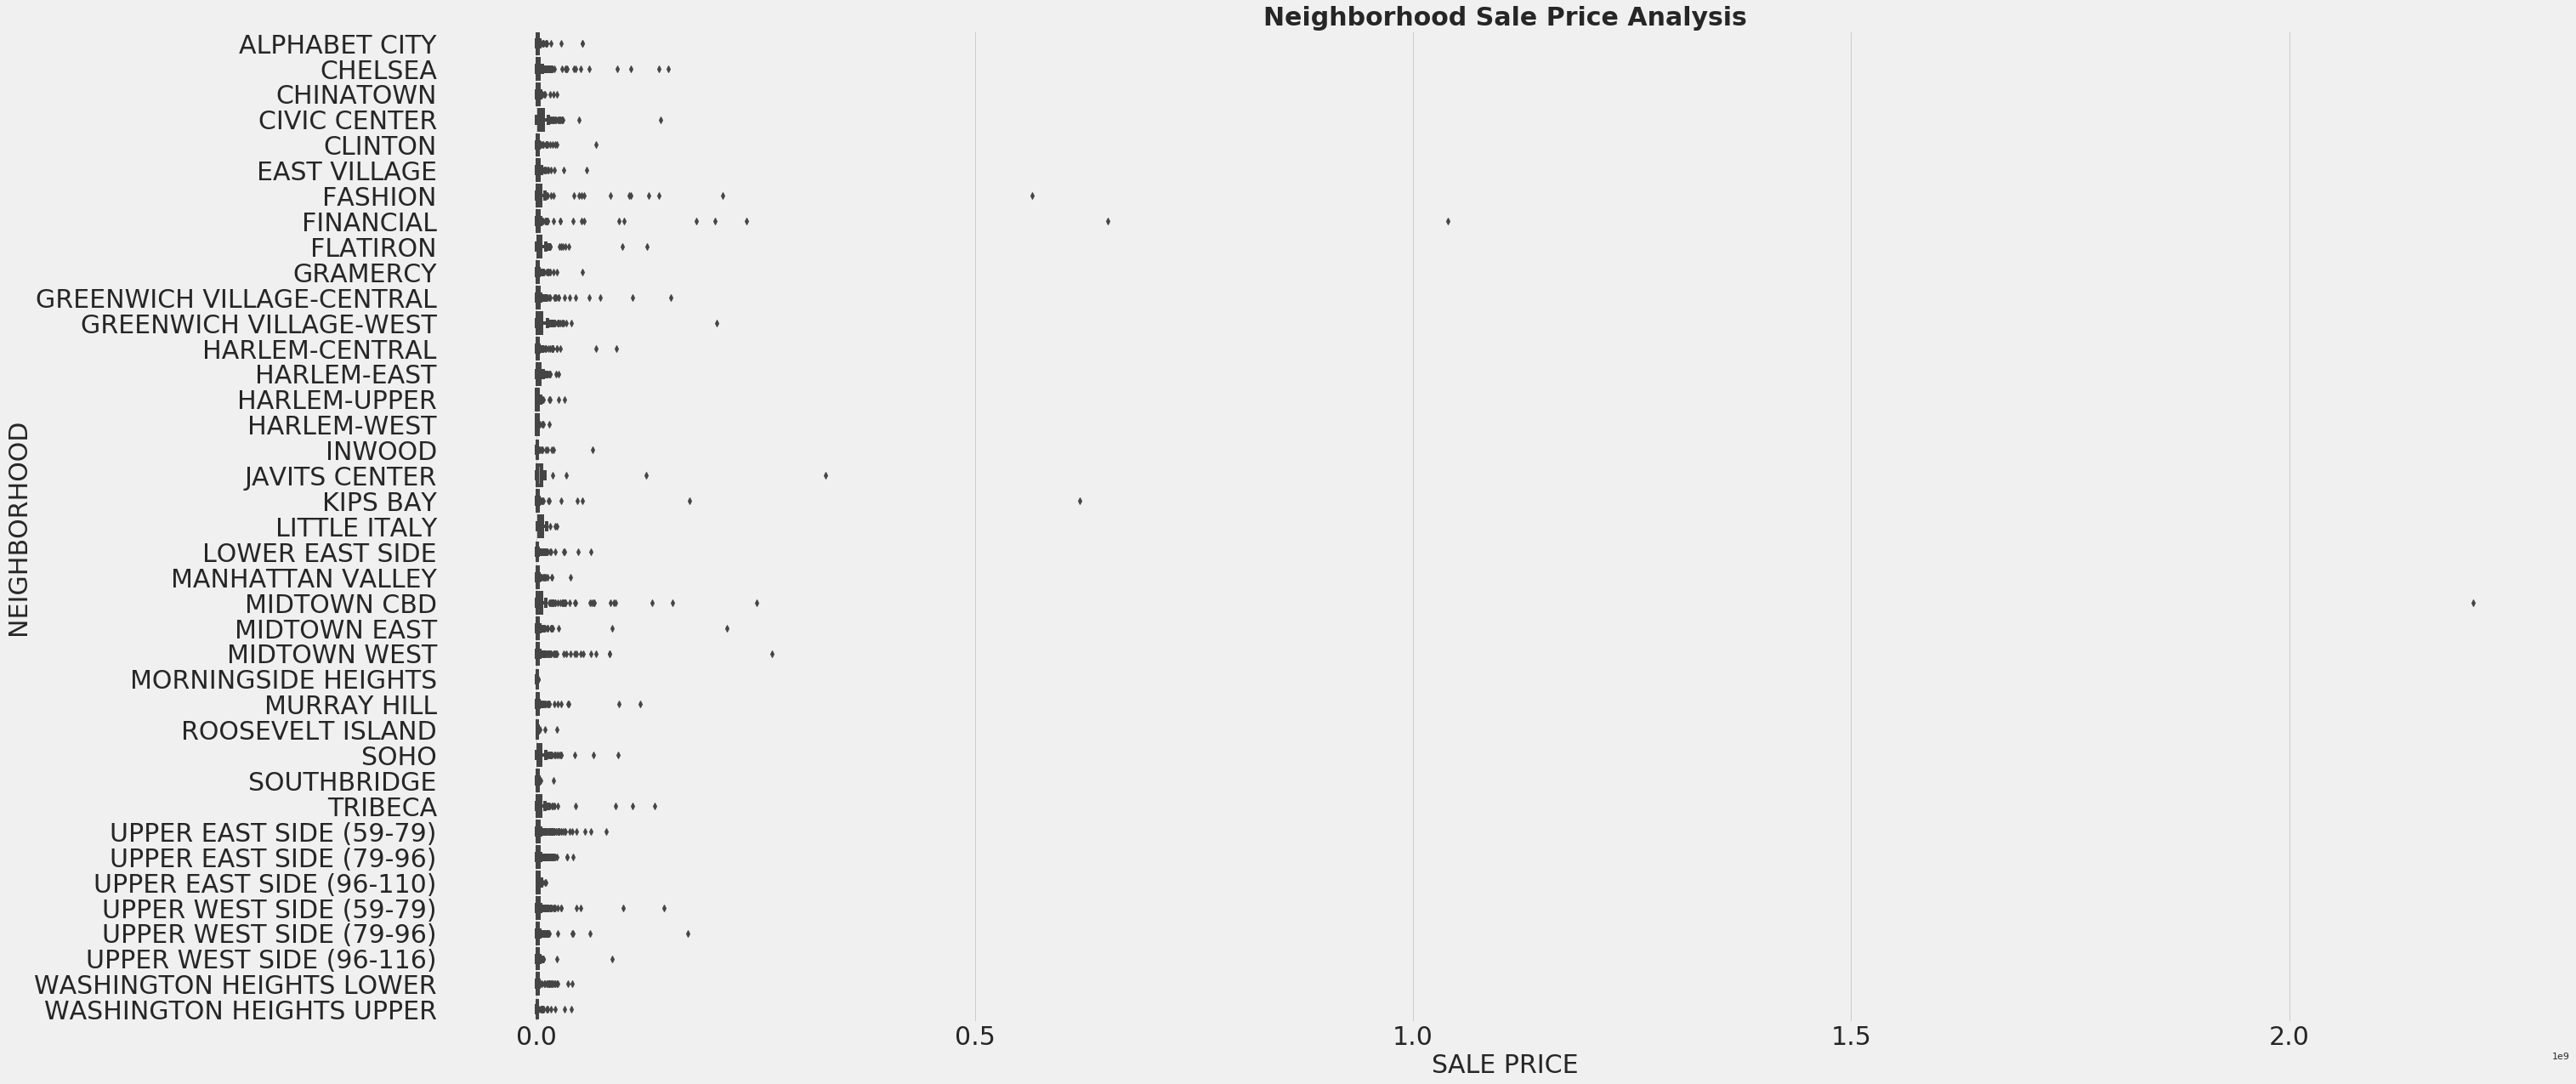

In [66]:
fig, ax = plt.subplots(figsize=(40,20))
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)
ax.set_title('Neighborhood Sale Price Analysis', fontweight="bold", size=30)
ax.set_ylabel('Neighborhood', fontsize = 30)
ax.set_xlabel('Sale Price', fontsize = 30)
sns.boxplot(x='SALE PRICE', y='NEIGHBORHOOD', data=df_manhattan)

In [67]:
df_manhattan.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


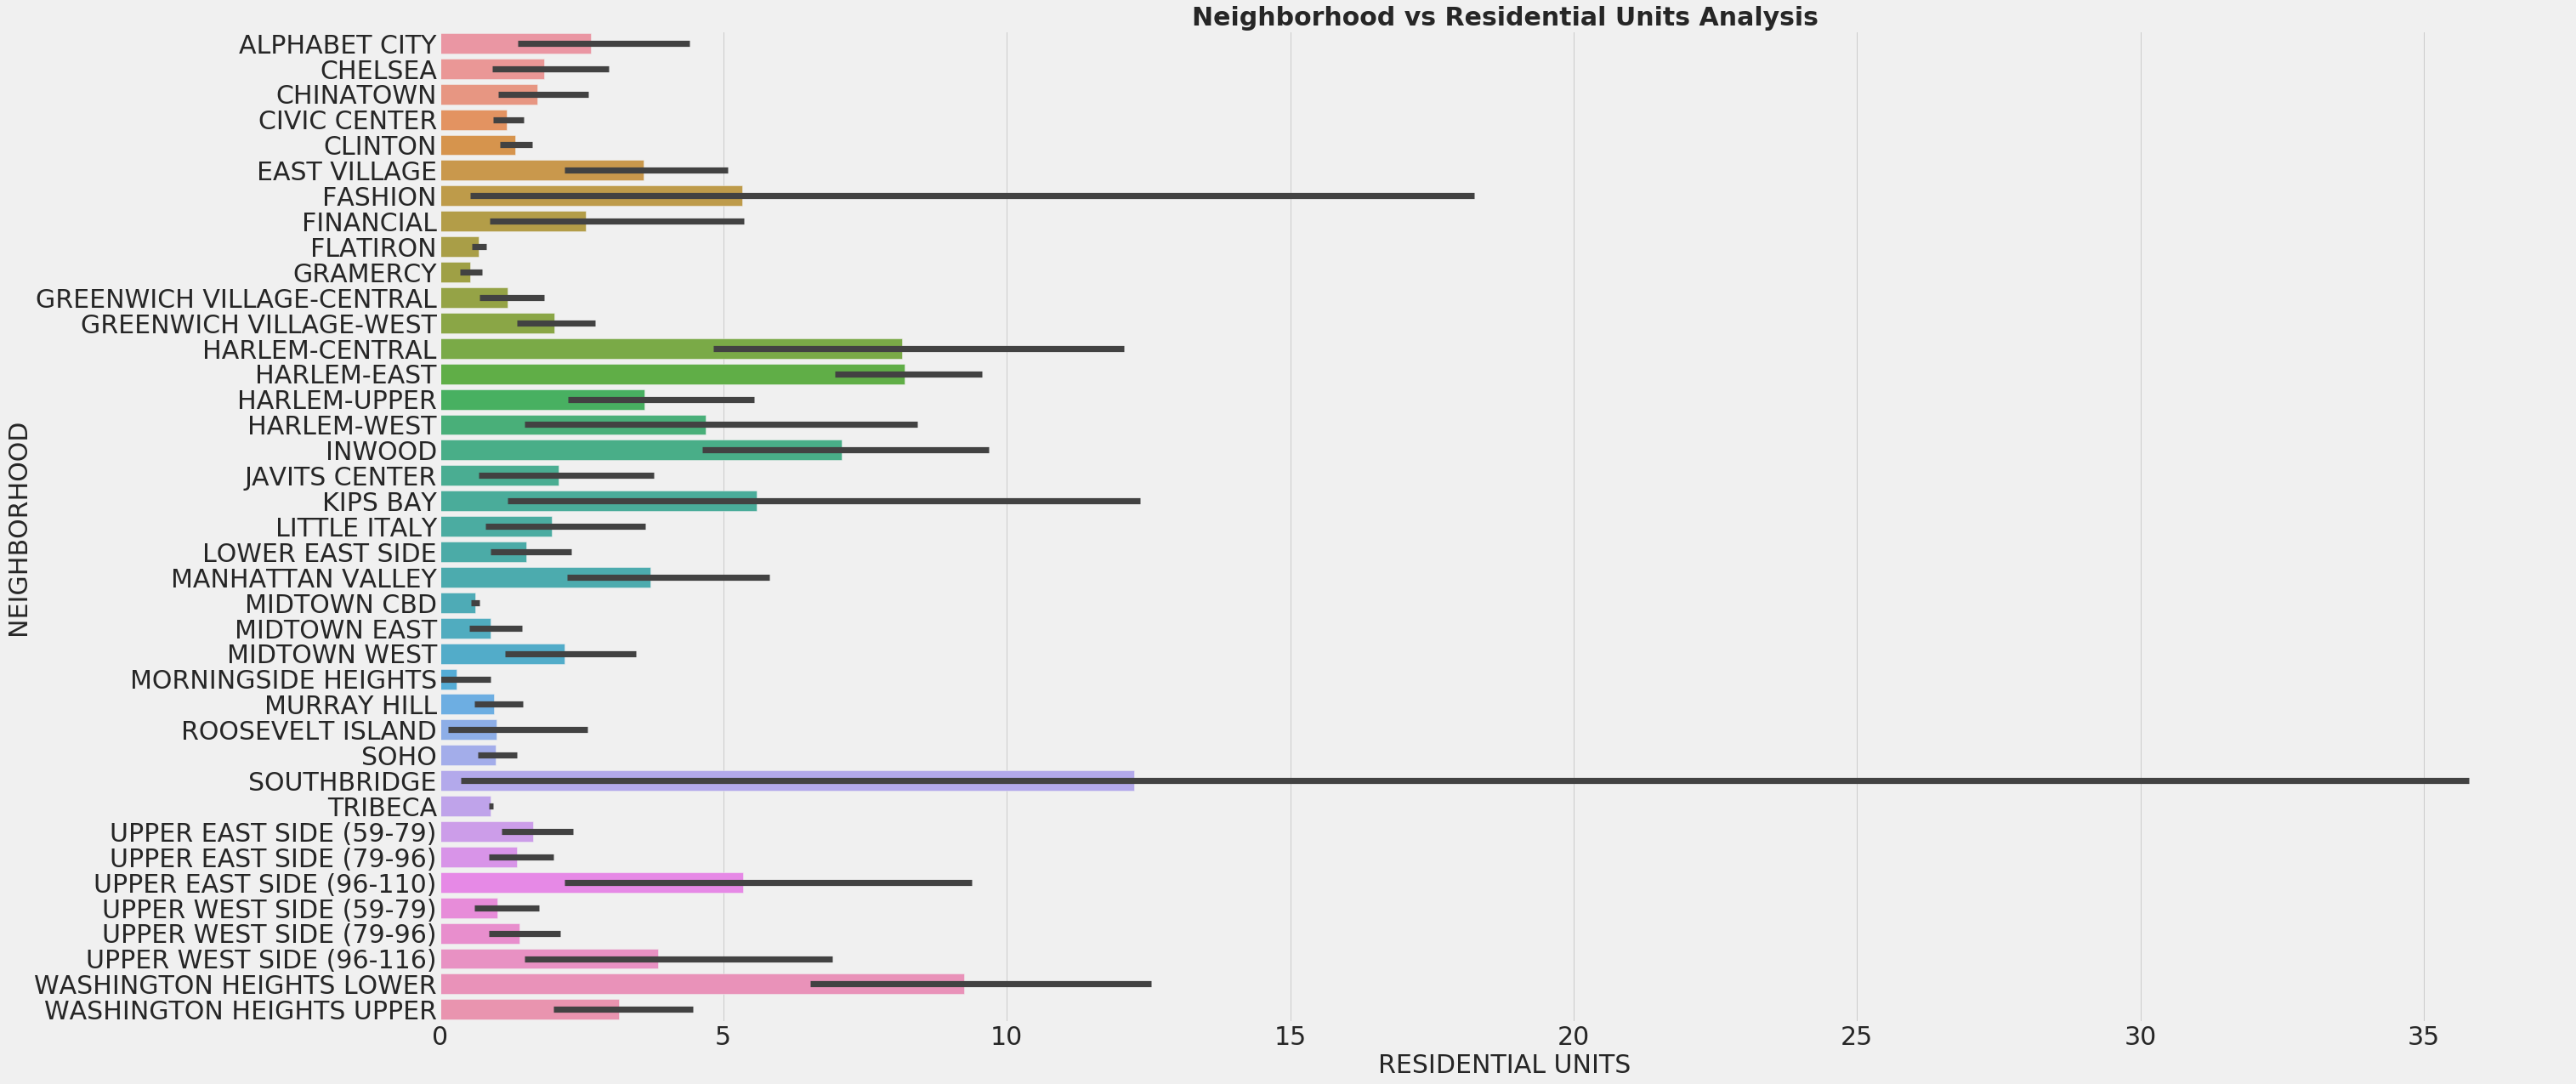

In [68]:
fig, ax = plt.subplots(figsize=(40,20))
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30)
ax.set_title('Neighborhood vs Residential Units Analysis', fontweight="bold", size=30)
ax.set_ylabel('Neighborhood', fontsize = 30)
ax.set_xlabel('Residential Units', fontsize = 30)
sns.barplot(x='RESIDENTIAL UNITS', y='NEIGHBORHOOD', data=df_manhattan)

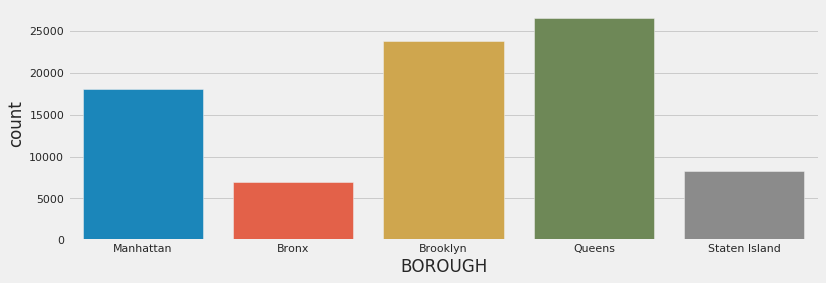

In [69]:
plt.figure(figsize=(12,4))
sns.countplot(x='BOROUGH', data=df)

We have a lot more data on "Brooklyn" than any other borough within the data set. This might indicate there are more real estate properties in Brooklyn than other boroughs. Interesting that Queens is the largest borough in NYC but has less real estate properties. This might also indicate that our data set might not be accurate. 

We have Sale Date data as a variable in our dataset. However using sale data, considering the amount of possible variations might make it difficult to use as a predictor variable. So I will categorize them and create a season variable.

In [70]:
def get_season(x):
    if x==1:
        return 'Summer'
    elif x==2:
        return 'Fall'
    elif x==3:
        return 'Winter'
    elif x==4:
        return 'Spring'
    else:
        return ''
df['seasons']=df['SALE DATE'].apply(lambda x:x.month)
df['seasons']=df['seasons'].apply(lambda x:(x%12+3)//3)
df['seasons']=df['seasons'].apply(get_season)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1296x576 with 0 Axes>

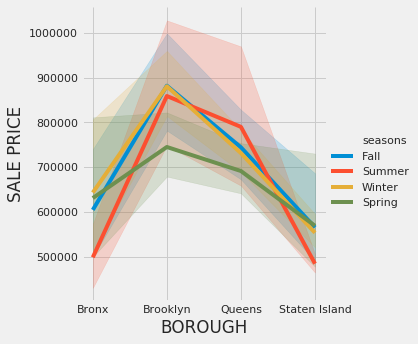

In [71]:
plt.figure(figsize=(18,8))
df_wo_manhattan=df.loc[df['BOROUGH']!='Manhattan']
sns.relplot(x="BOROUGH", y="SALE PRICE",hue='seasons' ,kind="line", data=df_wo_manhattan,legend='full')

There is no correlation between sale price and seaons. For example; Sale prices go up and down during the summer for all boroughs. There is definately a correlation between boroughs and sale price though. Keep in mind, correlation does not mean causation. Cause of something will require more investigation. In this case, I can't use seasons as a predictor variable for my model.

Lets see if there is a linear correlation between "Land Square Feet" and "Sales Price" . Simple Linear Regression is a very straight forward data model; it can help us understand the relationship between Land Square Feet and Sales Price.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


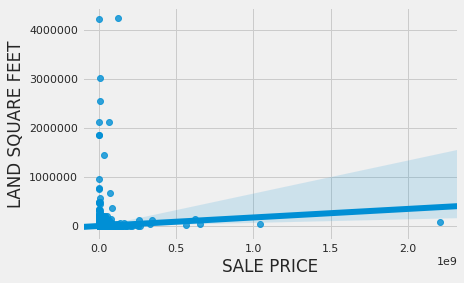

In [72]:
sns.regplot(x='SALE PRICE', y='LAND SQUARE FEET', data=df)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
df[['SALE PRICE', 'GROSS SQUARE FEET', 'LAND SQUARE FEET']]

,SALE PRICE,GROSS SQUARE FEET,LAND SQUARE FEET
0,6625000.0,6440.000000,1633.000000
1,NaN,18690.000000,4616.000000
2,NaN,7803.000000,2212.000000
3,3936272.0,6794.000000,2272.000000
4,8000000.0,4615.000000,2369.000000
5,NaN,9730.000000,2581.000000
6,3192840.0,4226.000000,1750.000000
7,NaN,21007.000000,5163.000000
8,NaN,9198.000000,1534.000000
9,16232000.0,18523.000000,4489.000000


In [75]:
df.dropna(subset=["SALE PRICE"], axis=0, inplace = True)

In [76]:
df.reset_index(drop = True, inplace = True)

In [77]:
df.dropna(subset=['GROSS SQUARE FEET', 'LAND SQUARE FEET'], axis=0, inplace=True)

In [78]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
X = df[['SALE PRICE']]
Y = df['GROSS SQUARE FEET']

In [80]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Here is our prediction model (single regression) using Gross Square Feet as a predictive variable.

In [81]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([ 8736.18891738,  6173.66993792, 10046.64635181,  5465.13467146,
       17892.23587925])

In [82]:
## intercept value is
lm.intercept_

2422.1667333157084

In [83]:
## slope
lm.coef_

array([0.00095306])

<ul>
    <li>Final Predictive Model using Single Linear Regression </li>
    <li>Yhat=a+bx </li>
    <li>a is intercept</li>
    <li>b is slope</li>
    <li> final formula == SALE PRICE = 2422.1667333157084 + 0.00095306 * GROSS SQUARE FEET  

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 2325248234.023482)

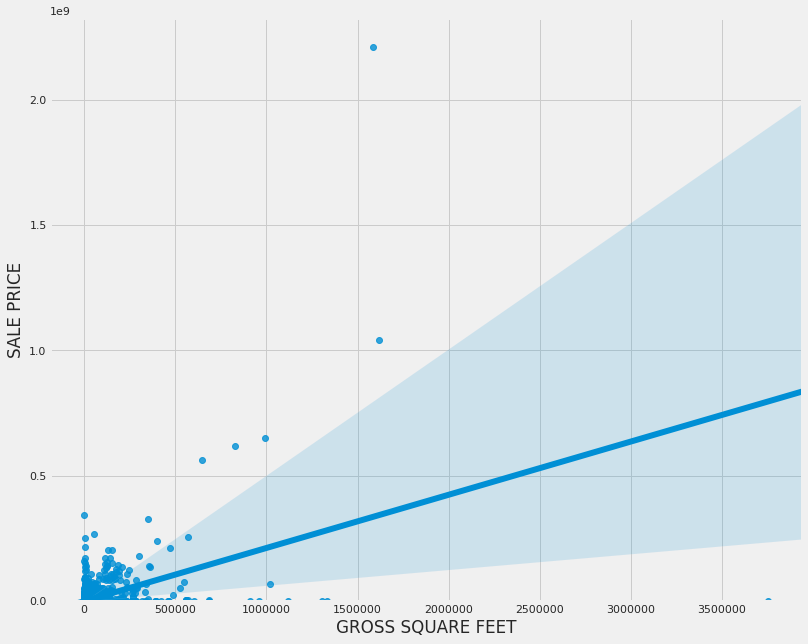

In [84]:
plt.figure(figsize=(12, 10))
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=df)
plt.ylim(0,)

Conclusion: We can use single regression to create a predictive model GROSS SQUARE FEET AND OR LAND SQUARE FEET as the predictive variable.

Let's see if we can use the BOROUGH

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


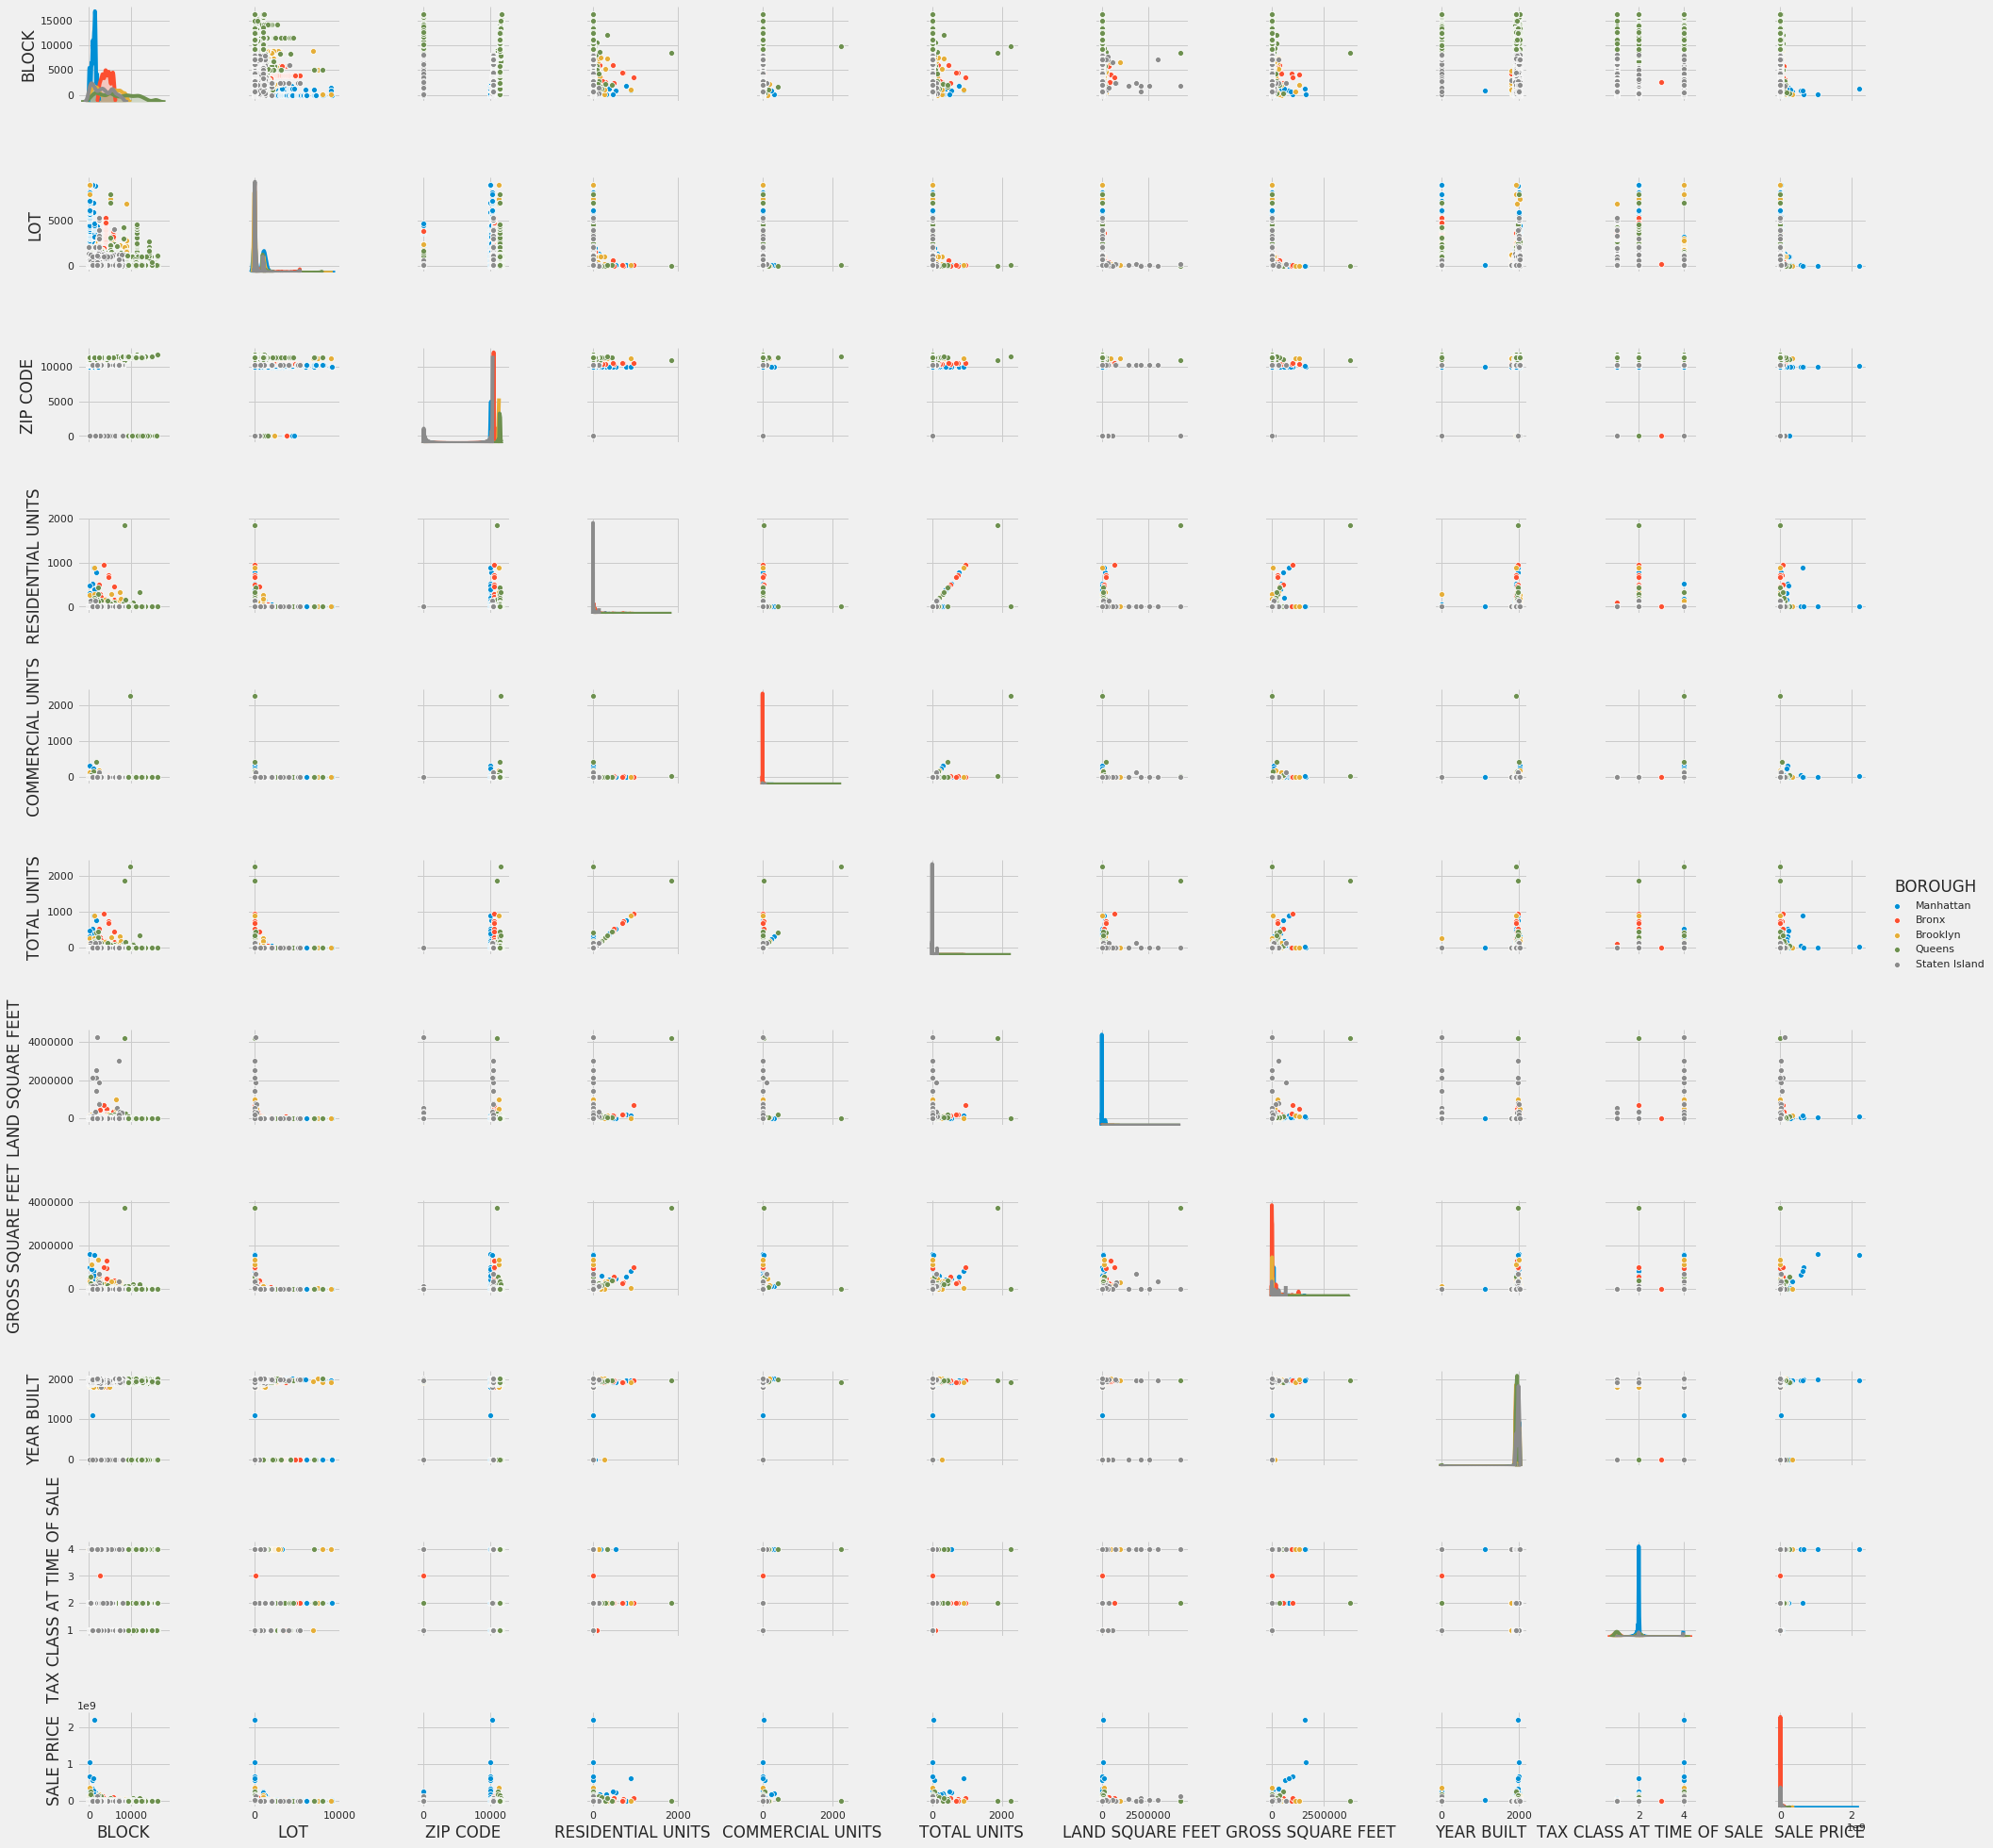

In [85]:
sns.pairplot(data=df, hue='BOROUGH')

Based on the data exploration, I can use GROSS SQUARE FEET, LAND SQAURE FEET as predictive variable for Single or Multi Linear Regresstion data model. Important data variables are;

<ul>
    <li>Residential Units</li>
    <li>Land Square Feet</li>
    <li>Gross Square Feet</li>
    <li>Age of the Building Sale</li>


## Data Preperation

In [86]:
variable_model=['BOROUGH','BUILDING CLASS CATEGORY','COMMERCIAL UNITS','GROSS SQUARE FEET',
               'SALE PRICE','Building Age During Sale','LAND SQUARE FEET','RESIDENTIAL UNITS','seasons']
data_model=df.loc[:,variable_model]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [87]:
important_features=['BOROUGH','BUILDING CLASS CATEGORY','seasons']
longest_str=max(important_features,key=len)
total_num_of_unique_cat=0
for feature in important_features:
    num_unique=len(data_model[feature].unique())
    print('{} : {} unique categorical values '.format(feature,num_unique))
    total_num_of_unique_cat+=num_unique
print('Total {} will be added with important feature adding'.format(total_num_of_unique_cat))

BOROUGH : 5 unique categorical values 
BUILDING CLASS CATEGORY : 47 unique categorical values 
seasons : 4 unique categorical values 
Total 56 will be added with important feature adding


"SALE PRICE" is the dependent variable meaning , we are trying to predict the sale price in our 

In [88]:
df[df['SALE PRICE']==0.0].sum().count()

20

In [89]:
important_features_included = pd.get_dummies(data_model[important_features])
important_features_included.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69607 entries, 0 to 69606
Data columns (total 56 columns):
BOROUGH_Bronx                                                           69607 non-null uint8
BOROUGH_Brooklyn                                                        69607 non-null uint8
BOROUGH_Manhattan                                                       69607 non-null uint8
BOROUGH_Queens                                                          69607 non-null uint8
BOROUGH_Staten Island                                                   69607 non-null uint8
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         69607 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         69607 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       69607 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           69607 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND    

In [90]:
data_model.drop(important_features,axis=1,inplace=True)
data_model=pd.concat([data_model,important_features_included],axis=1)
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,Building Age During Sale,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_17 CONDO COOPS,BUILDING CLASS CATEGORY_18 TAX CLASS 3 - UNTILITY PROPERTIES,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_25 LUXURY HOTELS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_34 THEATRES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_40 SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_49 CONDO WAREHOUSES/FACTORY/INDUS,seasons_Fall,seasons_Spring,seasons_Summer,seasons_Winter
0,0,6440.0,6625000.0,NaN,1633.0,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,6794.0,3936272.0,NaN,2272.0,10,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,4615.0,8000000.0,NaN,2369.0,6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,4226.0,3192840.0,NaN,1750.0,8,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,18523.0,16232000.0,NaN,4489.0,24,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


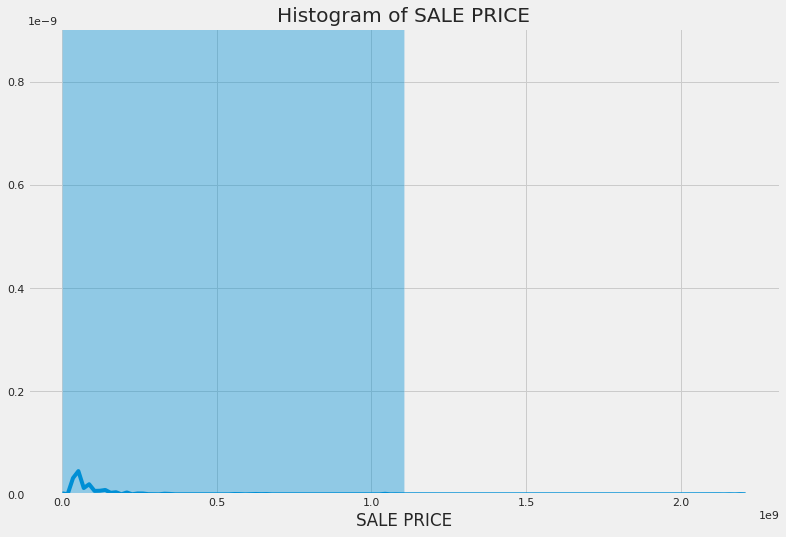

In [91]:
plt.figure(figsize=(12,8))
sns.distplot(data_model['SALE PRICE'],bins=2)
plt.title('Histogram of SALE PRICE')
plt.show()

In [92]:
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,Building Age During Sale,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_17 CONDO COOPS,BUILDING CLASS CATEGORY_18 TAX CLASS 3 - UNTILITY PROPERTIES,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_25 LUXURY HOTELS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_34 THEATRES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_40 SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_49 CONDO WAREHOUSES/FACTORY/INDUS,seasons_Fall,seasons_Spring,seasons_Summer,seasons_Winter
0,0,6440.0,6625000.0,NaN,1633.0,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,6794.0,3936272.0,NaN,2272.0,10,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,4615.0,8000000.0,NaN,2369.0,6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,4226.0,3192840.0,NaN,1750.0,8,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,18523.0,16232000.0,NaN,4489.0,24,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [93]:
data_model=data_model[data_model['SALE PRICE']!=0]
data_model

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,Building Age During Sale,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_17 CONDO COOPS,BUILDING CLASS CATEGORY_18 TAX CLASS 3 - UNTILITY PROPERTIES,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_25 LUXURY HOTELS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_34 THEATRES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_40 SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_49 CONDO WAREHOUSES/FACTORY/INDUS,seasons_Fall,seasons_Spring,seasons_Summer,seasons_Winter
0,0,6440.000000,6625000.0,NaN,1633.000000,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,6794.000000,3936272.0,NaN,2272.000000,10,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,4615.000000,8000000.0,NaN,2369.000000,6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,4226.000000,3192840.0,NaN,1750.000000,8,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,18523.000000,16232000.0,NaN,4489.000000,24,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,12350.000000,10350000.0,NaN,3717.000000,10,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,3894.415813,1.0,NaN,3854.481179,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,3894.415813,499000.0,NaN,3854.481179,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0,3894.415813,10.0,NaN,3854.481179,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


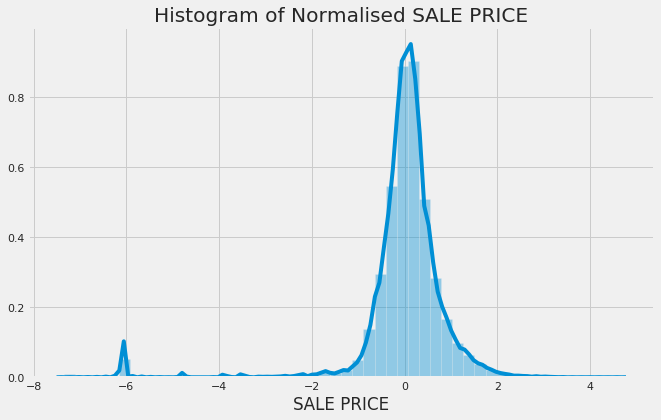

In [94]:
data_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(data_model['SALE PRICE']).values.reshape(-1,1))
plt.figure(figsize=(10,6))
sns.distplot(data_model['SALE PRICE'])
plt.title('Histogram of Normalised SALE PRICE')
plt.show()

In [95]:
data_model.describe()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,Building Age During Sale,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11 SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_17 CONDO COOPS,BUILDING CLASS CATEGORY_18 TAX CLASS 3 - UNTILITY PROPERTIES,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_25 LUXURY HOTELS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_34 THEATRES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_36 OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_39 TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_40 SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_49 CONDO WAREHOUSES/FACTORY/INDUS,seasons_Fall,seasons_Spring,seasons_Summer,seasons_Winter
count,59595.000000,5.959500e+04,5.959500e+04,0.0,5.959500e+04,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.0,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000,59595.000000
mean,0.154023,3.598321e+03,-3.284978e-15,NaN,3.747726e+03,1.721671,0.086719,0.262723,0.241195,0.308919,0.100445,0.217686,0.170065,0.040389,0.021361,0.008675,0.000839,0.030137,0.003507,0.042134,0.193506,0.000017,0.000319,0.011192,0.174276,0.005638,0.017468,0.000638,0.018659,0.0,0.003759,0.008205,0.000369,0.000134,0.001024,0.001846,0.000235,0.004749,0.002819,0.003322,0.000487,0.000487,0.000084,0.000285,0.000101,0.001057,0.000268,0.000017,0.000034,0.000956,0.000084,0.004145,0.004816,0.001359,0.001292,0.001191,0.000201,0.000168,0.252085,0.248662,0.245474,0.253780
std,9.670540,2.372818e+04,1.000008

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [97]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
lm.score(X, Y)

0.2021744165910453

In [99]:
Yhat=lm.predict(X)
Yhat[0:4]

array([ 8736.18891738,  6173.66993792, 10046.64635181,  5465.13467146])

In [100]:
from sklearn.metrics import mean_squared_error

In [101]:
mean_squared_error(df['SALE PRICE'], Yhat)

132033314365613.39

## Split the Data Set

In [102]:
y=data_model['SALE PRICE']
X=data_model.drop('SALE PRICE',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print('Size of Training data: {} \n Size of test data: {}'.format(X_train.shape[0],X_test.shape[0]))

Size of Training data: 47676 
 Size of test data: 11919


We split our data set into two sections; Train and Test data sets.

In [103]:
data_model.shape[0]

59595

By our above exploration, we know we will be using single and multi linear regression.


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


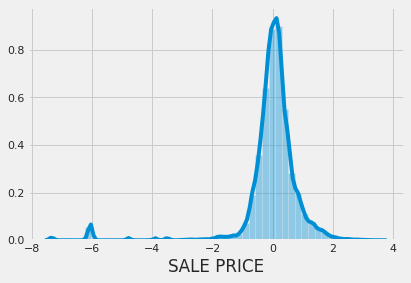

In [104]:
sns.distplot(y_test)
plt.show()

Conclusion:

<ul>
    <li>Dependent Variable is 'SALE PRICE'</li>
    <li>Predictive variables are 'LAND SQUARE FEET', GROSS SQUARE FEET', 'BOROUGH'</li>
    <li>Predictive Models to be used - Single Linear or Multi Linear Regression</li>
    